coral-app.py is a Flask app which exposes a tensorflow model as an endpoint. To run the app and expose over a network: 

 $ python3 coral-app.py

Then use curl to query:

In [1]:
!curl -X POST -F image=@images/people_car.jpg 'http://localhost:5000/predict'

{"predictions":[{"bounding_box":{"x1":838.29,"x2":135.01,"y1":135.01,"y2":407.59},"confidence":"95.31","label":"person"},{"bounding_box":{"x1":302.61,"x2":115.94,"y1":115.94,"y2":361.16},"confidence":"91.02","label":"car"},{"bounding_box":{"x1":226.54,"x2":143.46,"y1":143.46,"y2":374.72},"confidence":"58.2","label":"person"},{"bounding_box":{"x1":215.56,"x2":212.26,"y1":212.26,"y2":419.51},"confidence":"26.95","label":"bicycle"},{"bounding_box":{"x1":422.38,"x2":171.35,"y1":171.35,"y2":210.02},"confidence":"21.09","label":"person"},{"bounding_box":{"x1":359.8,"x2":161.48,"y1":161.48,"y2":204.62},"confidence":"21.09","label":"person"},{"bounding_box":{"x1":305.36,"x2":147.99,"y1":147.99,"y2":211.31},"confidence":"21.09","label":"person"},{"bounding_box":{"x1":5.55,"x2":9.36,"y1":9.36,"y2":45.3},"confidence":"21.09","label":"traffic light"},{"bounding_box":{"x1":239.76,"x2":260.07,"y1":260.07,"y2":406.78},"confidence":"16.02","label":"bicycle"},{"bounding_box":{"x1":299.75,"x2":154.64,"y

Alternatively we can use requests

In [2]:
!ls images/

face.jpg  my_setup.png	people_car.jpg


In [3]:
import requests

PREDICT_URL = 'http://localhost:5000/predict'
IMAGE_PATH = "images/people_car.jpg"
#IMAGE_PATH = "images/face.jpg"

# load the input image and construct the payload for the request
image = open(IMAGE_PATH, "rb").read()
payload = {"image": image}

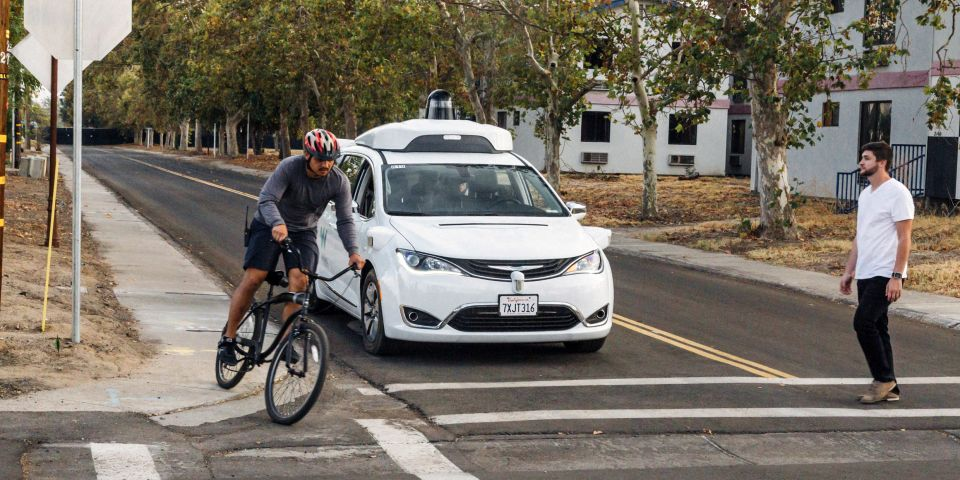

In [4]:
from IPython.display import Image
Image(IMAGE_PATH)

In [5]:
%%time
# submit the request
response = requests.post(PREDICT_URL, files=payload)

CPU times: user 5.8 ms, sys: 3.46 ms, total: 9.27 ms
Wall time: 48.8 ms


In [6]:
response.status_code

200

In [7]:
response.json()

{'predictions': [{'bounding_box': {'x1': 838.29,
    'x2': 135.01,
    'y1': 135.01,
    'y2': 407.59},
   'confidence': '95.31',
   'label': 'person'},
  {'bounding_box': {'x1': 302.61, 'x2': 115.94, 'y1': 115.94, 'y2': 361.16},
   'confidence': '91.02',
   'label': 'car'},
  {'bounding_box': {'x1': 226.54, 'x2': 143.46, 'y1': 143.46, 'y2': 374.72},
   'confidence': '58.2',
   'label': 'person'},
  {'bounding_box': {'x1': 215.56, 'x2': 212.26, 'y1': 212.26, 'y2': 419.51},
   'confidence': '26.95',
   'label': 'bicycle'},
  {'bounding_box': {'x1': 422.38, 'x2': 171.35, 'y1': 171.35, 'y2': 210.02},
   'confidence': '21.09',
   'label': 'person'},
  {'bounding_box': {'x1': 359.8, 'x2': 161.48, 'y1': 161.48, 'y2': 204.62},
   'confidence': '21.09',
   'label': 'person'},
  {'bounding_box': {'x1': 305.36, 'x2': 147.99, 'y1': 147.99, 'y2': 211.31},
   'confidence': '21.09',
   'label': 'person'},
  {'bounding_box': {'x1': 5.55, 'x2': 9.36, 'y1': 9.36, 'y2': 45.3},
   'confidence': '21.09',


## Process response

In [8]:
import helpers
CONFIDENCE = 50 # A threshold percentage for confidence

In [9]:
mydict = {'a':1, 'b': 2}
list(mydict.values())

[1, 2]

In [10]:
# ensure the request was successful
if response.status_code == 200:
    predictions = response.json()['predictions']
    
    # loop over the predictions and display them
    for result in predictions:
        print("{}: {}: {}".format(result["label"], result["confidence"], result["bounding_box"]))

person: 95.31: {'x1': 838.29, 'x2': 135.01, 'y1': 135.01, 'y2': 407.59}
car: 91.02: {'x1': 302.61, 'x2': 115.94, 'y1': 115.94, 'y2': 361.16}
person: 58.2: {'x1': 226.54, 'x2': 143.46, 'y1': 143.46, 'y2': 374.72}
bicycle: 26.95: {'x1': 215.56, 'x2': 212.26, 'y1': 212.26, 'y2': 419.51}
person: 21.09: {'x1': 422.38, 'x2': 171.35, 'y1': 171.35, 'y2': 210.02}
person: 21.09: {'x1': 359.8, 'x2': 161.48, 'y1': 161.48, 'y2': 204.62}
person: 21.09: {'x1': 305.36, 'x2': 147.99, 'y1': 147.99, 'y2': 211.31}
traffic light: 21.09: {'x1': 5.55, 'x2': 9.36, 'y1': 9.36, 'y2': 45.3}
bicycle: 16.02: {'x1': 239.76, 'x2': 260.07, 'y1': 260.07, 'y2': 406.78}
person: 16.02: {'x1': 299.75, 'x2': 154.64, 'y1': 154.64, 'y2': 298.7}


In [11]:
helpers.get_object_classes(predictions, CONFIDENCE)

{'car', 'person'}

In [12]:
helpers.get_object_instances(predictions, 'person', CONFIDENCE)

2

In [13]:
helpers.get_objects_summary(predictions, CONFIDENCE)

{'person': 2, 'car': 1}

## Draw bounding boxes

In [14]:
from PIL import Image
from PIL import ImageDraw
%matplotlib inline

In [15]:
image = Image.open(IMAGE_PATH)  # PIL img object.
draw = ImageDraw.Draw(image)

In [16]:
image_width = image.size[0]
image_width

960

In [17]:
image_height = image.size[1]
image_height

480

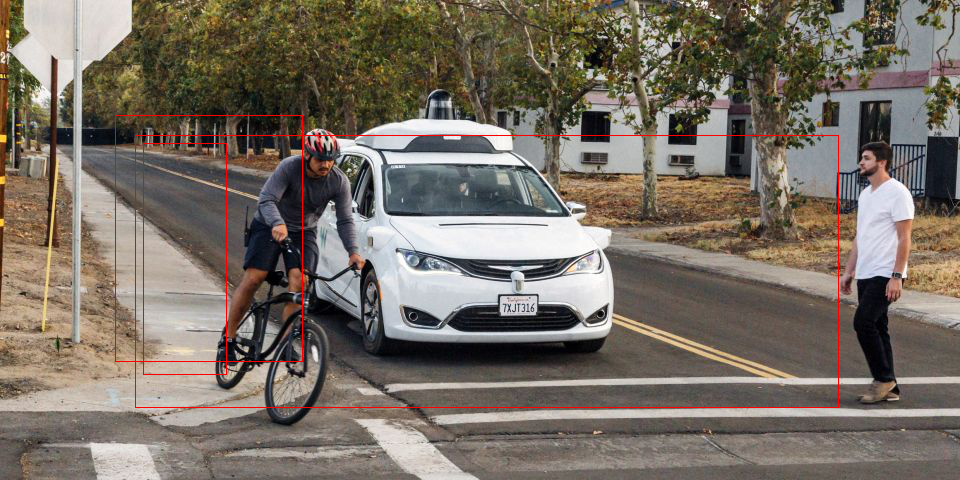

In [18]:
for result in predictions:
    b_box = result["bounding_box"]
    # bounding_box = [b_box['x1'], b_box['y1'], b_box['x2'], b_box['y2']]
    bounding_box = list(b_box.values())
    if float(result["confidence"]) > CONFIDENCE:
        draw.rectangle(bounding_box, outline='red')
        
display(image)

Hmm not sure why boxes are wrong